# Lets Grow More - Data Science Internship


## Intermediate Level Task

# Task-2: Prediction using Decision Tree Algorithm.



## Importing necessary libraries and Warnings

In [1]:
# Import necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [3]:
iris_data = pd.read_csv("iris.data",header=None)
iris_data.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
print(iris_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
iris_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [9]:
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualising Data

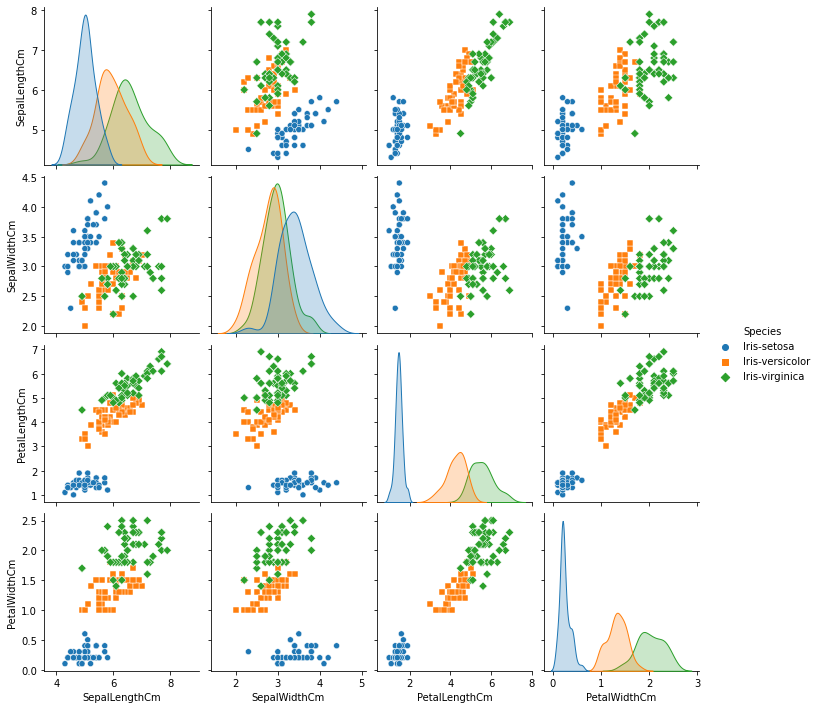

In [10]:
iris_df = iris_data.drop('Species',axis=1)
g = sns.pairplot(iris_data,hue='Species',kind='scatter',markers=["o", "s", "D"])
plt.show()

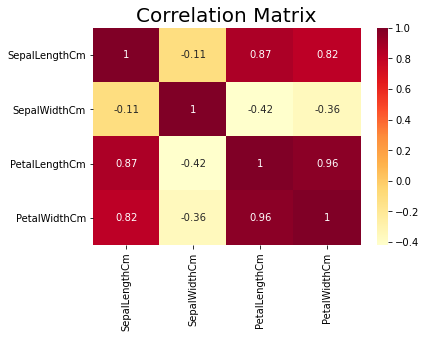

In [11]:
sns.heatmap(iris_data.corr(), cmap="YlOrRd", annot = True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

### Splitting Dataset into Training and Testing Set.

In [12]:
X = iris_data.drop(['Species'], 1)
y = iris_data['Species']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [14]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [15]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

## Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [18]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [19]:
print(f"Classification Report: \n\n{classification_report(y_test, y_pred)}")

Classification Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Visualizing Decision Tree Classifier.

In [20]:
features = iris_data.columns[:-1]
classes = iris_data['Species'].unique().tolist()

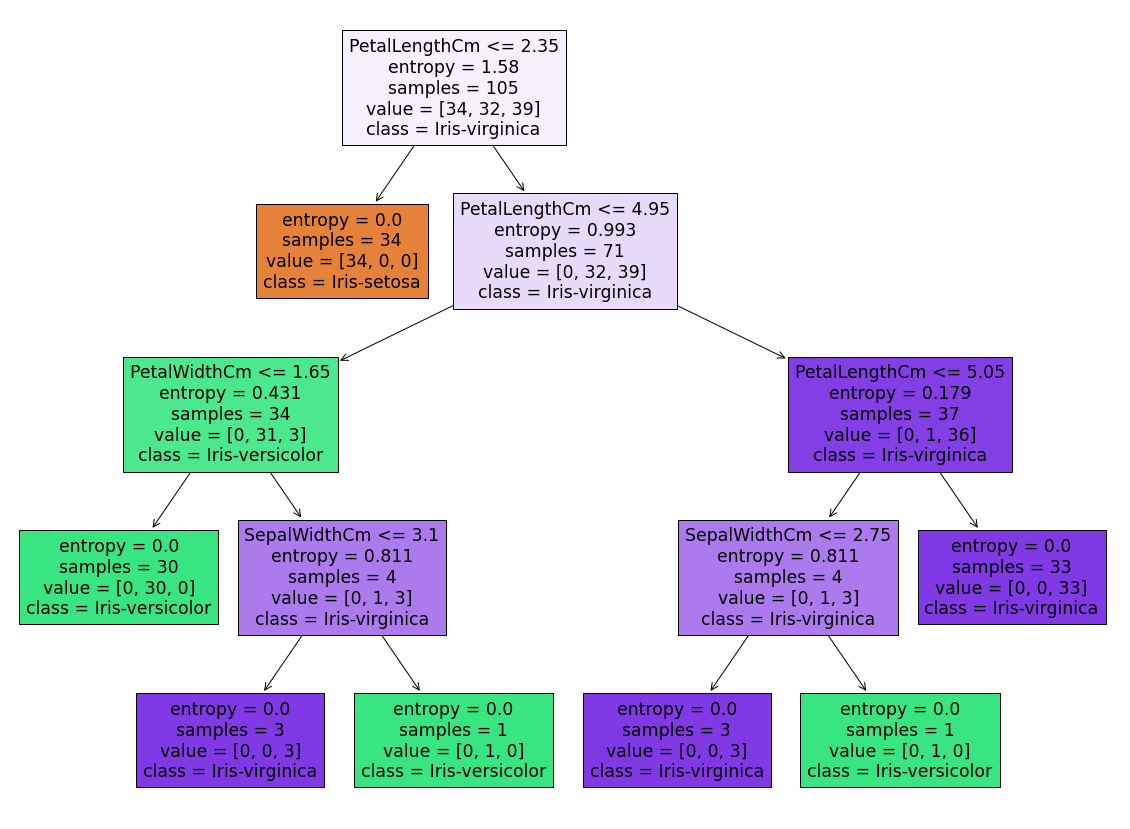

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(classifier, feature_names=features, class_names=classes, filled=True)
plt.show()

## Prediction on some data.

In [22]:
test1 = classifier.predict([[4.3, 3.5, 1.0, 0.2]])
print(test1[0])

Iris-setosa


In [23]:
test2 = classifier.predict([[6.0, 4.7, 4.1, 2.0]])
print(test2[0])

Iris-versicolor


In [24]:
test3 = classifier.predict([[7.6, 7.3, 8.5, 3.3]])
print(test3[0])

Iris-virginica


# The Classifier was able to predict the 3 different species on different dataset.

## Done by- Mansi Singh